In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [20]:
data = pd.read_csv('data/data.csv')

In [21]:
data.head()
#id column and the last column named Unnamed:32 seems really redundant


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [23]:
y = data.diagnosis
drop_cols = ['Unnamed: 32','id','diagnosis']
x = data.drop(drop_cols, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


No: of Benign tumors  357
No: of Malignant tumors  212


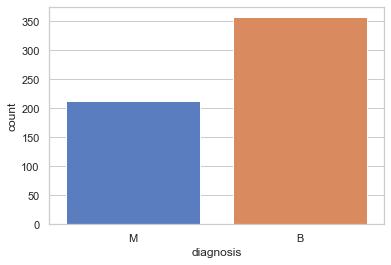

In [24]:
ax = sns.countplot(y, label="Count")
B,M = y.value_counts()
print('No: of Benign tumors ', B)
print('No: of Malignant tumors ', M)
#Now here there is a class imbalance problem as cases of Benign tumor is more

In [25]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


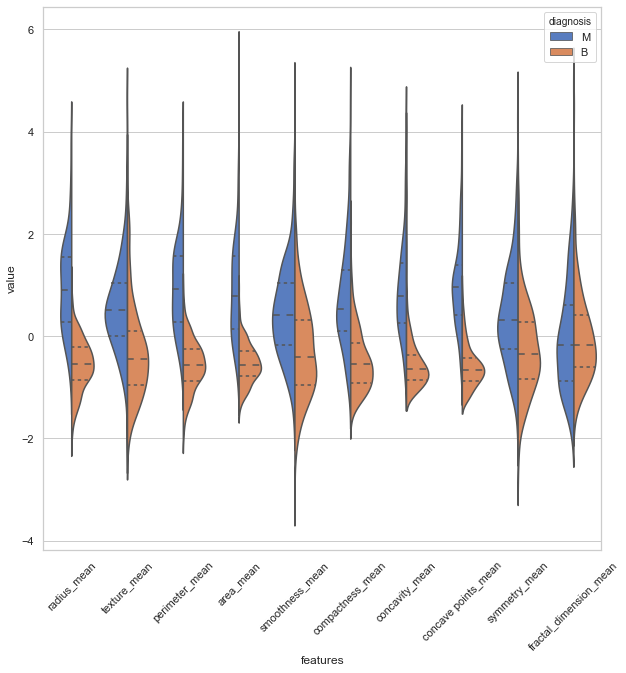

In [26]:
#we standardize the data as the the different columns have diff value ranges
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

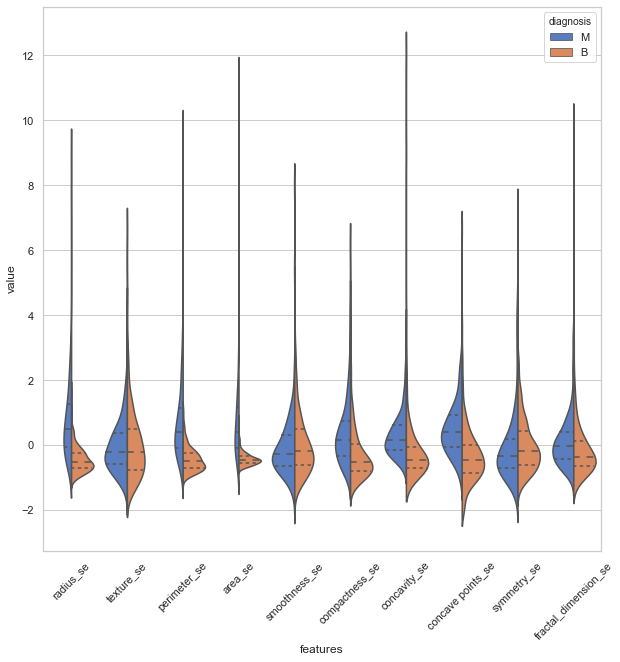

In [27]:
#plotting the next 10 features
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

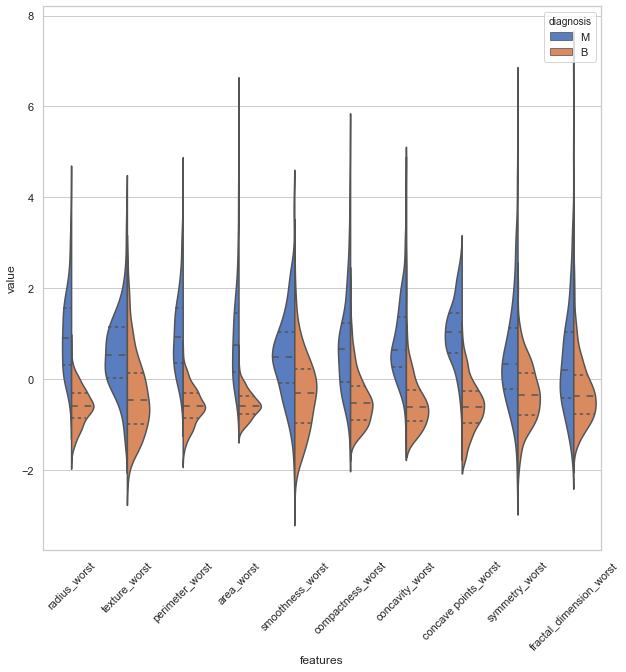

In [28]:
#plotting the last set of features
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

#here in the last violin plot we can observe that concavity_worst and concave points_worst have almost the same plot
#If they are correlated we can reduce the redundancy by dropping one of the columns


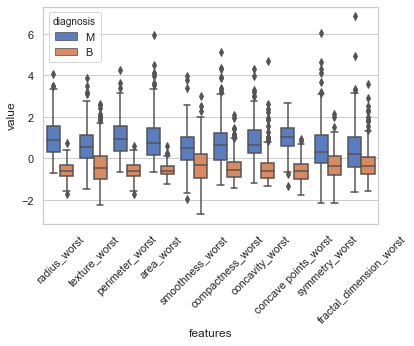

In [29]:
#box plot for last 10 features
#box plots are good to detect outliers
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

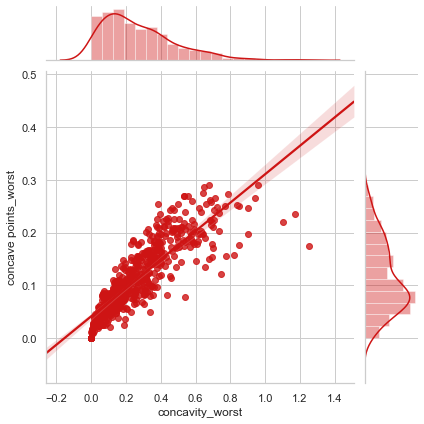

In [30]:
#Using Joint Plots for Feature Comparison(2features)
sns.jointplot(x.loc[:,'concavity_worst'],
             x.loc[:,'concave points_worst'],
             kind='regg',
             color='#ce1414');
#By looking at the graph we can say they are highly correlated


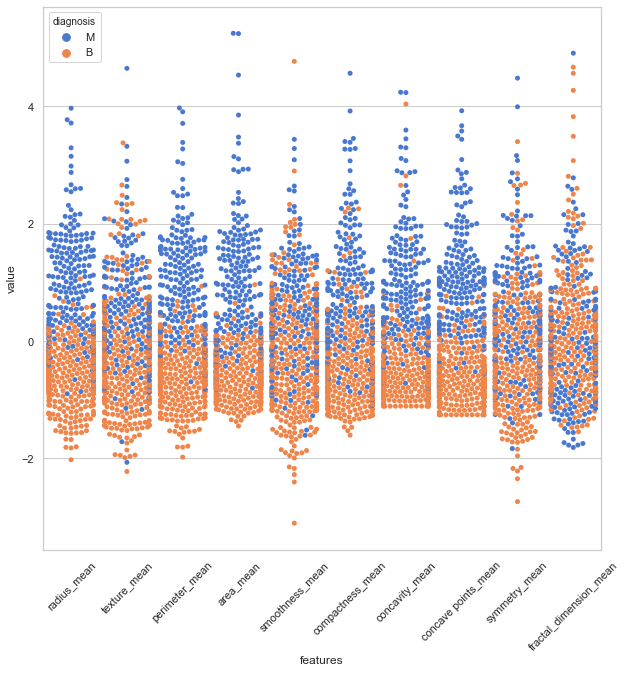

In [31]:
#Swarm plots in batches of 10
sns.set(style='whitegrid', palette='muted')
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

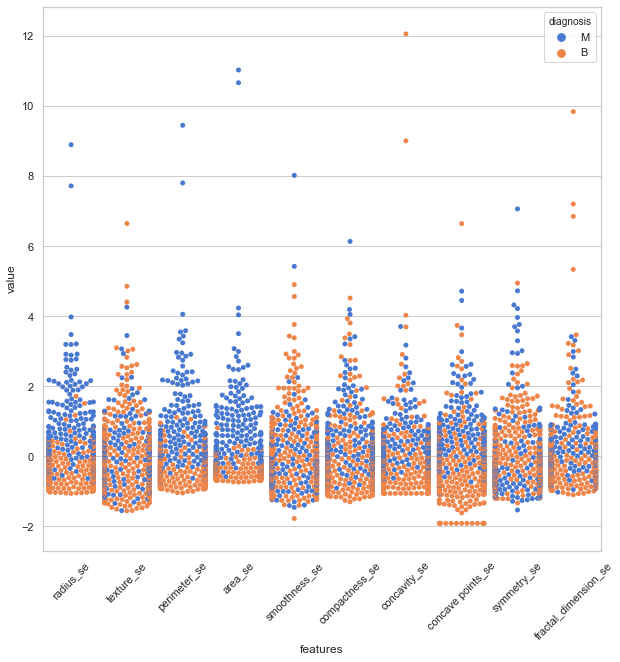

In [32]:
sns.set(style='whitegrid', palette='muted')
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

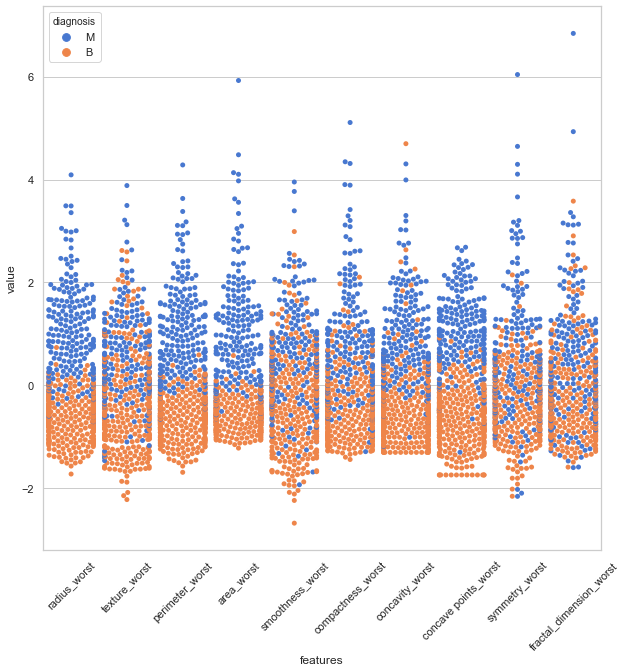

In [33]:
sns.set(style='whitegrid', palette='muted')
data = x 
data_std = (data-data.mean())/data.std()
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

#you can look at these plots to see how well separated the points are in each column

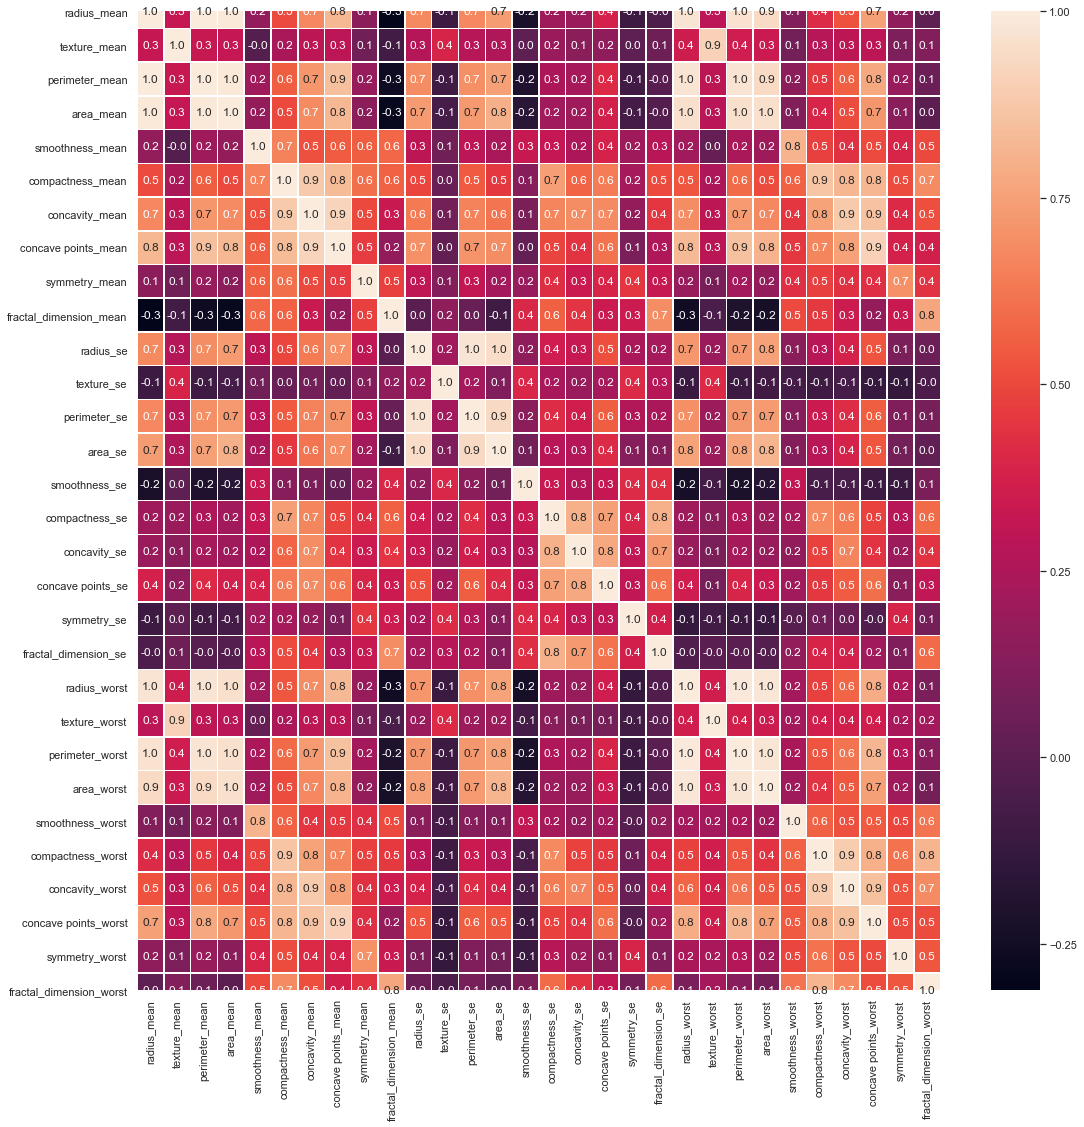

In [34]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidth=0.5, fmt='0.1f', ax=ax)

#we can either combine two highly correlated features or drop one of them